# RIESGO DE PADECER UN ATAQUE AL CORAZÓN


---



---



## INTRODUCCIÓN AL CASO DE ESTUDIO

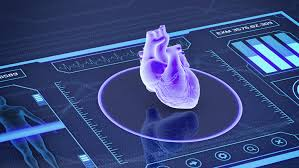

La enfermedad cardíaca es la principal causa de morbilidad y mortalidad a nivel mundial: representa más muertes al año que cualquier otra causa. Según la OMS , se estima que 17,9 millones de personas murieron por enfermedades cardíacas en 2016, lo que representa el 31% de todas las muertes mundiales. Más de las tres cuartas partes de estas muertes se produjeron en países de ingresos bajos y medianos.
De todas las enfermedades cardíacas, la enfermedad coronaria (también conocida como ataque cardíaco) es, con mucho, la más común y la más fatal. En los Estados Unidos, por ejemplo, se estima que alguien tiene un ataque cardíaco cada 40 segundos y alrededor de 805,000 estadounidenses tienen un ataque cardíaco cada año ( CDC 2019 ).
El lado positivo es que los ataques cardíacos son altamente prevenibles y las modificaciones simples en el estilo de vida (como reducir el consumo de alcohol y tabaco, comer de manera saludable y hacer ejercicio) junto con un tratamiento temprano mejoran enormemente su pronóstico. Sin embargo, es difícil identificar a los pacientes de alto riesgo debido a la naturaleza multifactorial de varios factores de riesgo que contribuyen, como la diabetes, la presión arterial alta, el colesterol alto, etc. Aquí es donde el aprendizaje automático y la minería de datos vienen al rescate.
Tanto los médicos como los científicos han recurrido a las técnicas de aprendizaje automático (ML) para desarrollar herramientas de detección y esto se debe a su superioridad en el reconocimiento y la clasificación de patrones en comparación con otros enfoques estadísticos tradicionales.

## DESCRIPCIÓN DEL CONJUNTO DE DATOS

El conjunto de datos está disponible públicamente en el sitio web de Kaggle y proviene de un estudio cardiovascular en curso en residentes de la ciudad de Framingham, Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene un riesgo de 10 años de enfermedad coronaria (CHD) en el futuro. 

El conjunto de datos proporciona la información de los pacientes. Incluye más de 4000 registros y 15 atributos. Cada atributo es un factor de riesgo potencial. 

Existen factores de riesgo demográficos, conductuales y médicos.

### Atributos:

1. Demográfico :

  - Sexo: masculino o femenino (nominal)
  
  - Edad: edad del paciente

2. Educación : no se proporcionó más información

3. Comportamiento :

  - Fumador actual: si el paciente es actual fumador o no (nominal)

  - Cigs Per Day: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que se puede fumar cualquier cantidad de cigarrillos, incluso medio cigarrillo).

4. Información sobre antecedentes médicos :

  - BP Meds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

  - Accidente cerebrovascular prevalente: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

  - Hip prevalente: si el paciente era hipertenso o no (nominal)

  - Diabetes: si el paciente tenía diabetes o no (nominal)

5. Información sobre la condición médica actual :

  - Tot Chol: nivel de colesterol total (continuo)

  - Sys BP: presión arterial sistólica (continua)

  - Dia BP: presión arterial diastólica (continua)

  - IMC: índice de masa corporal (continuo)

  - Frecuencia cardíaca: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

  - Glucosa: nivel de glucosa en sangre (continuo)

### Variable objetivo a predecir:

Riesgo de desarrollar enfermedad coronaria a 10 años vista (CHD) - (binario: "1", significa "Hay riesgo", "0" significa "No hay riesgo")

## DESARROLLO DEL PROYECTO

El proyecto se ha llevado a cabo en el lenguaje de programación Python y haciendo uso de sus diferentes librerías principales para proyectos de Data Science.

A continuación se muestra una breve descripción del enfoque general del proyecto:

  1. **Limpieza y preprocesamiento de datos** : se verifica y se tratan las variables faltantes y duplicadas del conjunto de datos, ya que pueden afectar enormemente el rendimiento de diferentes algoritmos de aprendizaje automático.

  2. **Análisis exploratorio de datos** : el objetivo es obtener información estadística importante a partir de los datos verificando las distribuciones de los diferentes atributos, las correlaciones de los atributos entre sí y la variable objetivo y calcular probabilidades y proporciones importantes para los atributos categóricos.

  3. **Selección de características** : dado que tener características irrelevantes en un conjunto de datos puede disminuir la precisión de los modelos aplicados, se utiliza la técnica de selección de características para seleccionar las características más importantes que luego se usaran para construir diferentes modelos.

  4. **Desarrollo y comparación de modelos** : se realizará el modelado de cuatro modelos de clasificación diferentes, es decir, regresión logística, K-vecinos más cercanos, árboles de decisión y máquina de vectores de soporte. Ddespués se compara el desempeño de los modelos usando su precisión y su F1.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 1- Limpieza y preprocesamiento de datos

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carga de las principales librerías 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Carga del dataset

data = pd.read_csv('/content/drive/MyDrive/01_Oriol/01_Machine Learning/00_PROYECTOS/04_Proyectos_Machine Learning/Heart/framingham.csv')

In [ ]:
# Eliminamos la columna de 'education' ya que no aporta información relevante para el proyecto

data.drop(['education'], axis= 1, inplace = True)

In [ ]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Datos faltantes

missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'El porcentaje total de datos faltantes es del {round(total_percentage,2)}%')

El porcentaje total de datos faltantes es del 12.74%


In [ ]:
# Porcentaje de datos faltantes por categoría

total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


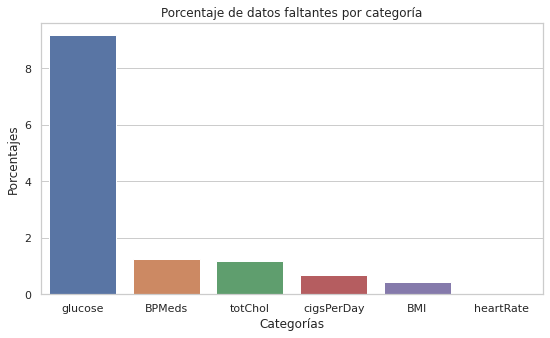

In [ ]:
plt.figure(figsize= (9, 5))
sns.set(style='whitegrid')
sns.barplot(x = missing_data.index, y = missing_data['Percentage'], data = missing_data)
plt.title('Porcentaje de datos faltantes por categoría')
plt.xlabel('Categorías')
plt.ylabel('Porcentajes')
plt.show()

Se observa que solo la categoría de glucosa en sangre es la que se ve afectada por gran cantidad de datos faltantes con un 9,15%.

Como los valores son inferiores al 10% podemos eliminar los datos faltantes.

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.shape

(3751, 15)

# 2- Análisis exploratorio de datos

In [ ]:
data['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

Se puede observar que disponemos de un dataset desbalanceado, ya que solo disponemos 572 casos con riesgo a padecer enfermedad coronaria en 10 años, y  3179 casos a no padecerla.

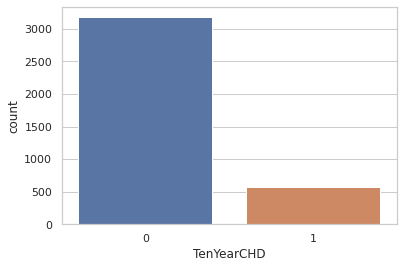

In [ ]:
sns.countplot(data['TenYearCHD'], label= 'count')

### Distribución de los datos

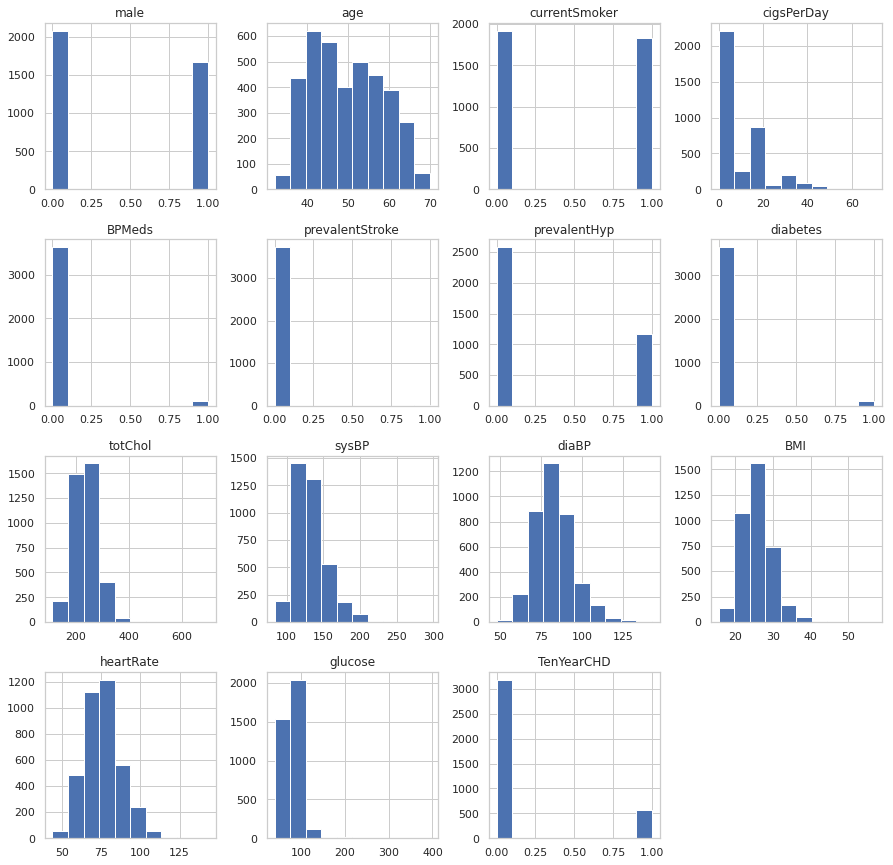

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

En el caso de las categorías  BPMeds, prevalentStroke y diabetes, nos encontramos con datos desbalanceados

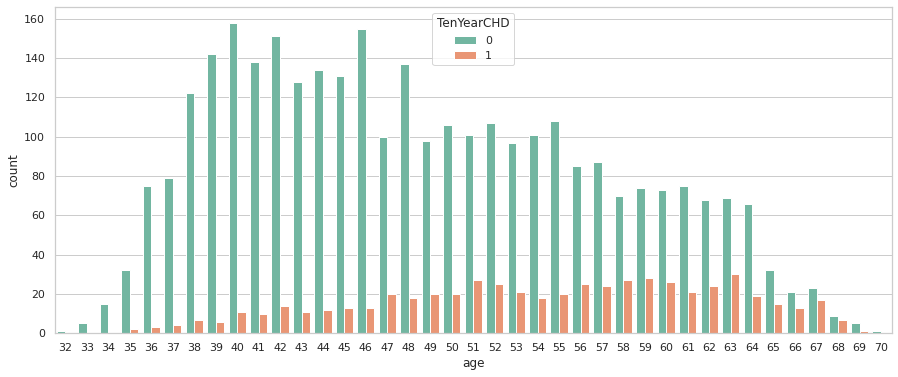

In [ ]:
# Distribución del riesgo por edad

plt.figure(figsize = (15,6))
sns.countplot(x = 'age', data = data, hue = 'TenYearCHD', palette = 'Set2')
plt.show()

La mayor incidencia en el mayor riesgo de padecer enfermedades cardiobasculares está entre las franjas de edad de 51 y 63 años

### Correlación de las variables

A continuación se realiza un estudio para ver la correlación de las variables

In [ ]:
data.iloc[:, 1:15].corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.211338,-0.188804,0.131690,0.050018,0.305292,0.109321,0.261443,0.388280,0.205191,0.136428,-0.005893,0.118529,0.231584
currentSmoker,-0.211338,1.000000,0.773259,-0.051816,-0.037573,-0.105258,-0.045308,-0.049945,-0.133154,-0.114118,-0.165404,0.054924,-0.054078,0.021709
cigsPerDay,-0.188804,0.773259,1.000000,-0.046625,-0.035713,-0.067470,-0.039436,-0.030600,-0.092310,-0.056202,-0.090525,0.067194,-0.055090,0.055920
BPMeds,0.131690,-0.051816,-0.046625,1.000000,0.111601,0.262955,0.056337,0.089625,0.269479,0.199282,0.105128,0.010228,0.052464,0.084740
prevalentStroke,0.050018,-0.037573,-0.035713,0.111601,1.000000,0.065169,0.009423,0.012297,0.060421,0.055189,0.035568,-0.016673,0.015789,0.047684
prevalentHyp,0.305292,-0.105258,-0.067470,0.262955,0.065169,1.000000,0.082030,0.164645,0.697849,0.616753,0.303411,0.142013,0.085776,0.178615
diabetes,0.109321,-0.045308,-0.039436,0.056337,0.009423,0.082030,1.000000,0.047453,0.104393,0.051761,0.093098,0.063370,0.616087,0.093222
totChol,0.261443,-0.049945,-0.030600,0.089625,0.012297,0.164645,0.047453,1.000000,0.216375,0.169811,0.119651,0.094795,0.046902,0.089613
sysBP,0.388280,-0.133154,-0.092310,0.269479,0.060421,0.697849,0.104393,0.216375,1.000000,0.785853,0.330484,0.181381,0.132878,0.220108
diaBP,0.205191,-0.114118,-0.056202,0.199282,0.055189,0.616753,0.051761,0.169811,0.785853,1.000000,0.383907,0.174918,0.061731,0.148994


Para ver la correlación en mas detalle de forma visual se ejecuta un mapa de correlación.

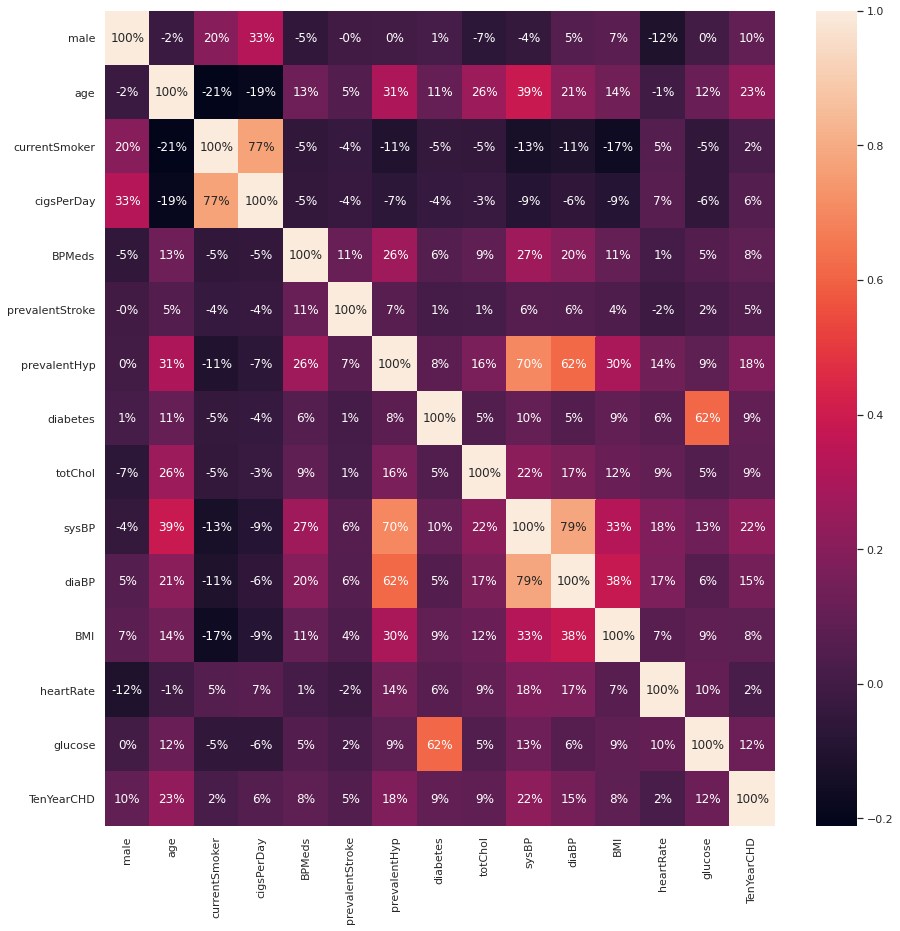

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:, :15].corr(), annot=True, fmt='.0%')

Las variables mas correlacionadas con el riesgo de padecer una enfermedad coronaria són la presión sistólica y la edad.

La máxima correlación es del 23%. Esto nos indica que ninguna de las características es importante para predecir el riesgo coronario.

# 3- Selección de características

Aquí se utiliza el algoritmo de Boruta, que se trata de un algoritmo construido alrededor del algoritmo de clasificación de random forest. Intenta capturar todas las características importantes e interesantes de un conjunto de datos con respecto a una variable resultado.

In [ ]:
pip install boruta

     |████████████████████████████████| 61kB 3.9MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [ ]:
# Primero definimos las variables

X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators= 500, n_jobs= -1, class_weight= 'balanced')

feat_selector = BorutaPy(forest, n_estimators= 'auto', verbose= 2)

feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=24, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FBC2CC62050,
                                          verbose=0, warm_star

In [ ]:
# Mostramos las características mas importantes

important_features = data.columns[:-1][feat_selector.support_].tolist()
important_features

['age', 'sysBP', 'BMI']

Tal y como se había observado en el mapa de correlación, las características con mayor correlación con el riesgo de enfermedad coronaria a 10 años son:

- Edad
- Tensión sistólica
- Añadiendo el índice de masa corporal

In [ ]:
# Buscamos las 5 características mas importantes

most_important_features = data.columns[:-1][feat_selector.ranking_ <=4].tolist()

most_important_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

Las 5 características mas importantes y con mayor correlación con el riesgo de enfermedad coronaria a 10 años son:

- Edad
- Colesterol total
- Tensión sistólica
- Tensión diastólica
- Índice de masa corporal
- Nivel de glucosa en sangre

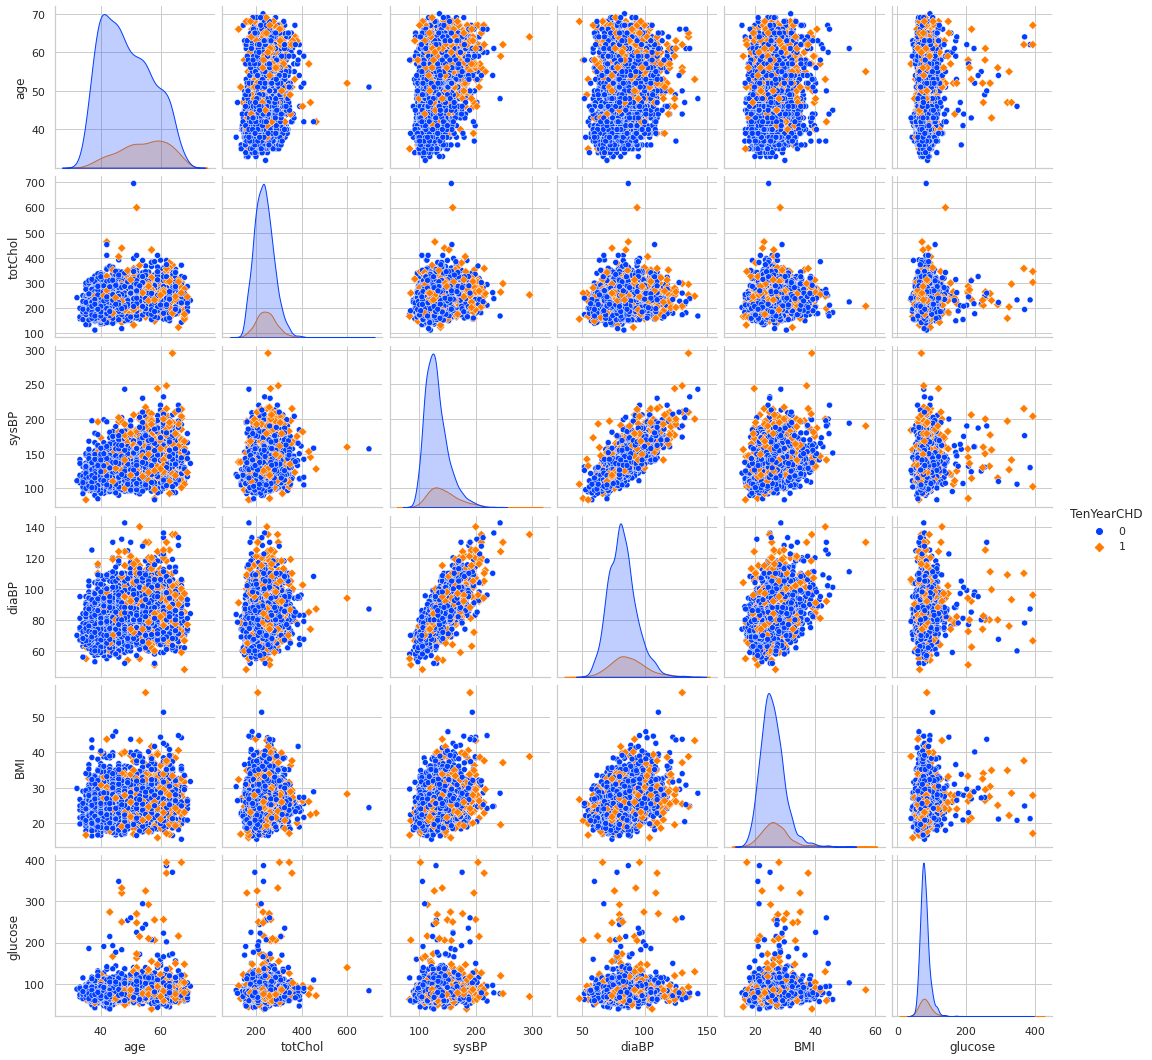

In [ ]:
# Observamos la correlación de las características mas importantes

sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "D"], vars = most_important_features, palette= "bright")

No se detecta ninguna característica que correlacione los datos de forma correcta

# 4- Desarrollo y comparación de modelos

### Balanceado del dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
X = data[most_important_features]
y = data.iloc[:,-1]

In [ ]:
num_before = dict(Counter(y))

num_before

{0: 3179, 1: 572}

In [ ]:
# Definimos la canalización del proceso de balanceado

over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
# Transformación del dataset

X_smote, y_smote = pipeline.fit_resample(X, y)

In [ ]:
num_after = dict(Counter(y_smote))

num_after

{0: 3178, 1: 2543}

### Preparación de los datos para el modelado

In [ ]:
# Nuevo dataset

new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,61.0,238.0,119.0,78.0,25.36,75.0,0
1,45.0,291.0,125.0,82.0,21.26,72.0,0
2,44.0,232.0,125.0,86.0,23.23,80.0,0
3,46.0,233.0,108.0,74.0,23.97,82.0,0
4,45.0,240.0,141.0,89.0,25.01,76.0,0


In [ ]:
X_new = new_data[most_important_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,glucose
0,61.0,238.0,119.0,78.0,25.36,75.0
1,45.0,291.0,125.0,82.0,21.26,72.0
2,44.0,232.0,125.0,86.0,23.23,80.0
3,46.0,233.0,108.0,74.0,23.97,82.0
4,45.0,240.0,141.0,89.0,25.01,76.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=40)

In [ ]:
# Escalamos las características para aplicar en el modelo

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### Modelos

1- Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
params_grid = {'penalty':['l1','l2'],
         'C':[0.001 , .009 , 0.01 , .09 , 1 , 5 , 10 , 25, 100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params_grid,cv=10)

In [ ]:
logistic_clf.fit(X_train, y_train)

logistic_clf.best_params_

{'C': 0.009, 'class_weight': 'balanced', 'penalty': 'l2'}

In [ ]:
logistic_pred = logistic_clf.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test,logistic_pred)
print(f"Con el modelo de Regresión logística obtenemos una precisión de {round(log_accuracy*100,2)}%")

Con el modelo de Regresión logística obtenemos una precisión de 68.12%


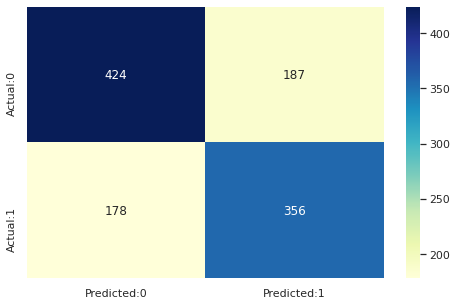

In [ ]:
# Elaboramos la matriz de consufión

cm=confusion_matrix(y_test,logistic_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       611
           1       0.66      0.67      0.66       534

    accuracy                           0.68      1145
   macro avg       0.68      0.68      0.68      1145
weighted avg       0.68      0.68      0.68      1145



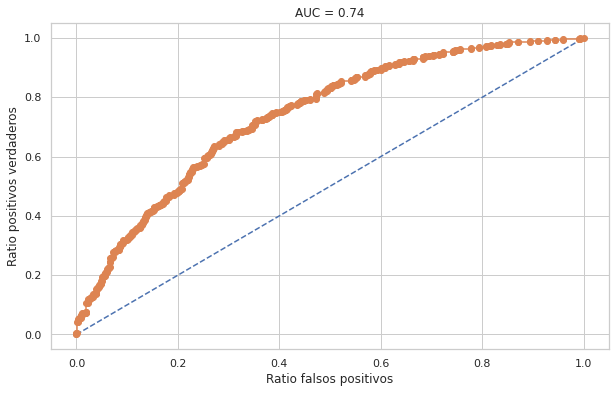

In [ ]:
# Curva ROC y AUC 
probs = logistic_clf.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# Cálculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='o')
plt.ylabel('Ratio positivos verdaderos')
plt.xlabel('Ratio falsos positivos')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

2- K-Vecinos cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
params_grid= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params_grid, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params_grid,cv=3, n_jobs=-1)

In [ ]:
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [ ]:
knn_predict = knn_clf.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Con el modelo de K vecinos cercanos obtenemos una precisión de {round(knn_accuracy*100,2)}%")

Con el modelo de K vecinos cercanos obtenemos una precisión de 81.92%


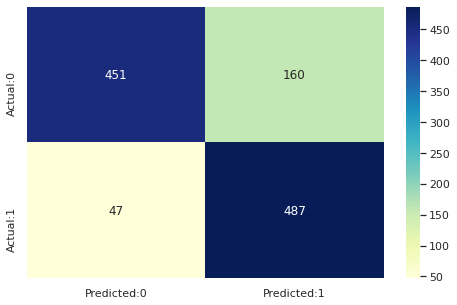

In [ ]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81       611
           1       0.75      0.91      0.82       534

    accuracy                           0.82      1145
   macro avg       0.83      0.83      0.82      1145
weighted avg       0.83      0.82      0.82      1145



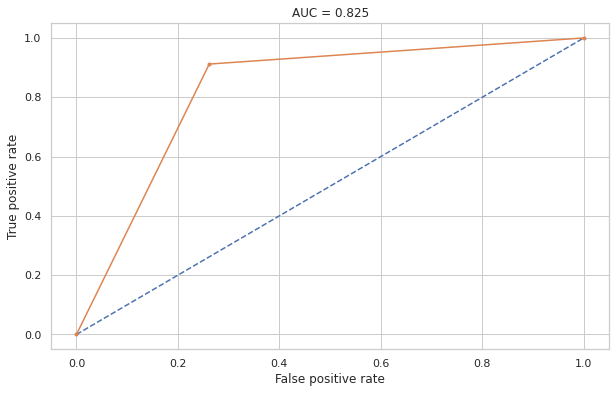

In [ ]:

# Curva ROC y AUC 
probs = knn_clf.predict_proba(X_test)

probs = probs[:, 1]
# cálculo AUC
knn_auc = roc_auc_score(y_test, probs)

# Cálculo ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

3- Árboles aleatorios

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [ ]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9}

In [ ]:
tree_predict = tree_clf.predict(X_test)

In [ ]:
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Con el modelo de árboles aleatorios obtenemos una precisión de {round(tree_accuracy*100,2)}%")

Con el modelo de árboles aleatorios obtenemos una precisión de 74.76%


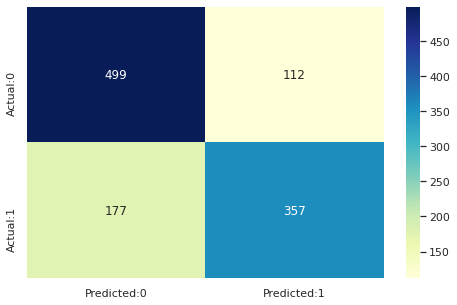

In [ ]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       611
           1       0.76      0.67      0.71       534

    accuracy                           0.75      1145
   macro avg       0.75      0.74      0.74      1145
weighted avg       0.75      0.75      0.75      1145



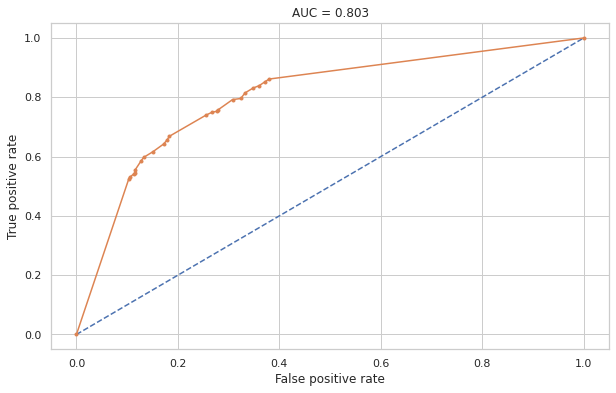

In [ ]:
probs = tree_clf.predict_proba(X_test)

probs = probs[:, 1]
# cálculo AUC
tree_auc = roc_auc_score(y_test, probs)

# cálculo curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

4- Suport Vector Machine SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [ ]:
svm_predict = svm_clf.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Con el modelo de Suport Vector Machine obtenemos una precisión de {round(svm_accuracy*100,2)}%")

Con el modelo de Suport Vector Machine obtenemos una precisión de 81.57%


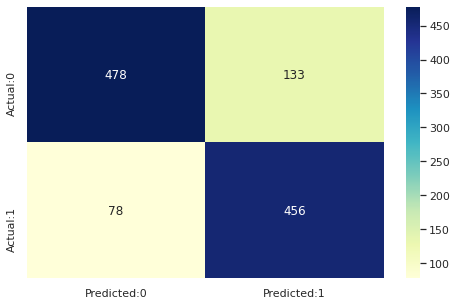

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       611
           1       0.77      0.85      0.81       534

    accuracy                           0.82      1145
   macro avg       0.82      0.82      0.82      1145
weighted avg       0.82      0.82      0.82      1145



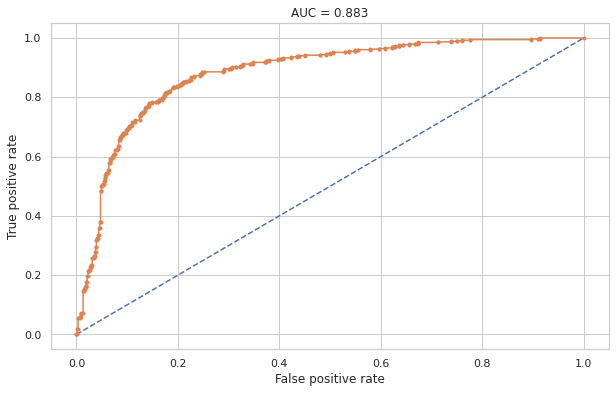

In [ ]:
probs = svm_clf.predict_proba(X_test)

probs = probs[:, 1]
# Cálculo AUC
svm_auc = roc_auc_score(y_test, probs)

# Cálculo curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

Comparación de los diferentes modelos

In [ ]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc,},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc,},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc,}
}).T

In [ ]:
comparison

,Accuracy,AUC
Logistic regression,0.681223,0.739526
K-nearest neighbours,0.819214,0.825060
Decision trees,0.747598,0.802600
Support vector machine,0.815721,0.882583


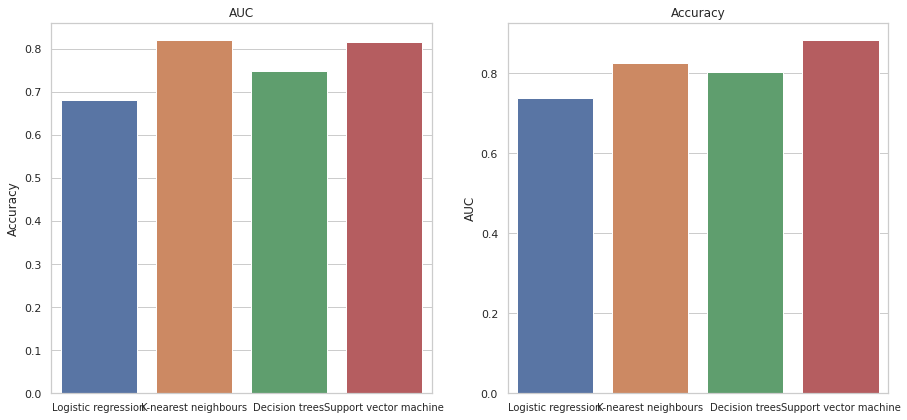

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

5- Deep learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_new)

In [ ]:
X

array([[0.76315789, 0.21440823, 0.1678487 , 0.31746032, 0.23800291,
        0.09887006],
       [0.34210526, 0.30531732, 0.19621749, 0.35978836, 0.13863306,
        0.09039548],
       [0.31578947, 0.20411664, 0.19621749, 0.4021164 , 0.18637906,
        0.11299435],
       ...,
       [0.58591165, 0.19601966, 0.43043355, 0.72331065, 0.23649159,
        0.14788943],
       [0.83144271, 0.2585394 , 0.33460715, 0.48191471, 0.29927631,
        0.11100964],
       [0.71841792, 0.16573782, 0.24018856, 0.37063901, 0.25836228,
        0.10621402]])

In [ ]:
X.shape

(5721, 6)

In [ ]:
y = new_data['TenYearCHD']

In [ ]:
y.shape

(5721,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(6, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               3500      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 501       
Total params: 505,001
Trainable params: 505,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_hist = model.fit(X_new, y_new, epochs = 100, batch_size=50)

Epoch 1/100
115/115 [==============================] - 2s 8ms/step - loss: 3.8721 - accuracy: 0.5293
Epoch 2/100
115/115 [==============================] - 1s 8ms/step - loss: 0.6549 - accuracy: 0.6216
Epoch 3/100
115/115 [==============================] - 1s 7ms/step - loss: 0.6571 - accuracy: 0.6099
Epoch 4/100
115/115 [==============================] - 1s 8ms/step - loss: 0.6653 - accuracy: 0.6078
Epoch 5/100
115/115 [==============================] - 1s 8ms/step - loss: 0.6587 - accuracy: 0.6156
Epoch 6/100
115/115 [==============================] - 1s 8ms/step - loss: 0.6495 - accuracy: 0.6247
Epoch 7/100
115/115 [==============================] - 1s 8ms/step - loss: 0.6413 - accuracy: 0.6386
Epoch 8/100
115/115 [==============================] - 1s 7ms/step - loss: 0.6469 - accuracy: 0.6295
Epoch 9/100
115/115 [==============================] - 1s 8ms/step - loss: 0.6487 - accuracy: 0.6298
Epoch 10/100
115/115 [==============================] - 1s 7ms/step - loss: 0.6505 - accura

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[0.00752971],
       [0.00756618],
       [0.00760016],
       ...,
       [0.00803477],
       [0.00738287],
       [0.00738704]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

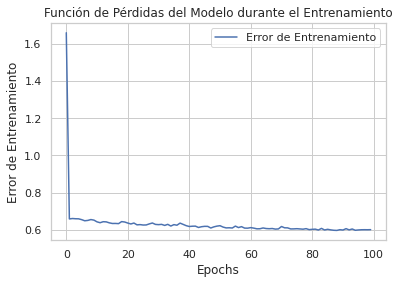

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

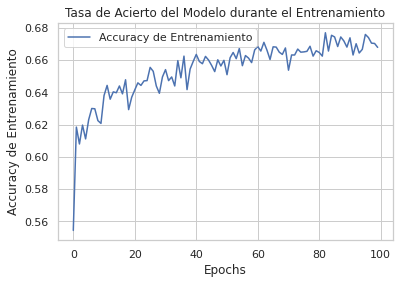

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

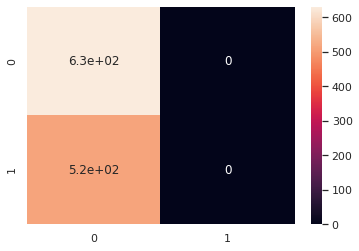

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       630
           1       0.00      0.00      0.00       515

    accuracy                           0.55      1145
   macro avg       0.28      0.50      0.35      1145
weighted avg       0.30      0.55      0.39      1145



# 5- Conclusiones

1- Las características más importantes para predecir el riesgo de desarrollar una cardiopatía isquémica a los diez años son la edad y la presión arterial sistólica.

2- Suport Vector Machine ha sido el modelo que mejor ha funcionado en términos de precisión y puntuación F1. Su alto AUC demuestra que tiene una alta tasa de verdaderos positivos.

3- El equilibrado del conjunto de datos mediante la técnica de smote ha ayudado a mejorar la sensibilidad de los modelos